# Import Libraries and TensorFlow

In [ ]:
import tensorflow as tf

In [ ]:
import keras as tf

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
import numpy as np

In [ ]:
!pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# GPU

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12554747608884531255
 xla_global_id: -1]

# Data Preparation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from IPython.display import Image

In [ ]:
import pathlib
path = 'drive/MyDrive/Colab Notebooks/dataset' #ที่อยู่ของข้อมูล
data_dir = pathlib.Path(path)

# Check Dataset (picture) Number

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

39


# Calling an Example Picture in Dataset Before Training

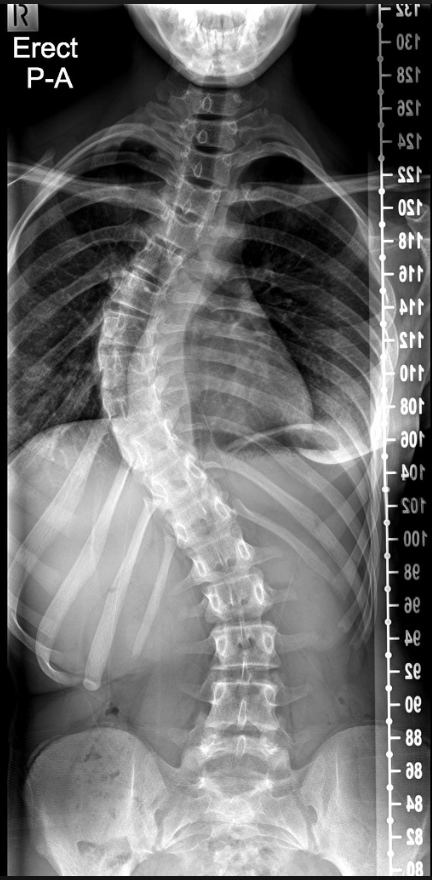

In [ ]:
single = list(data_dir.glob('single/*'))
PIL.Image.open(str(single[1]))

# Identify the size of dataset

In [ ]:
batch_size = 16
img_height = 180
img_width = 180

# Train and validate dataset

(แบ่งรูปภาพทั้งหมดโดยจะทำการแบ่งเป็นการ Train 80% และ validation 20%)

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset='training',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset='validation',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 39 files belonging to 2 classes.
Using 32 files for training.
Found 39 files belonging to 2 classes.
Using 7 files for validation.


# Class Definition

In [ ]:
class_names = train_ds.class_names
print(class_names)

['double', 'single']


# Randomly choose pictures to present the dataset

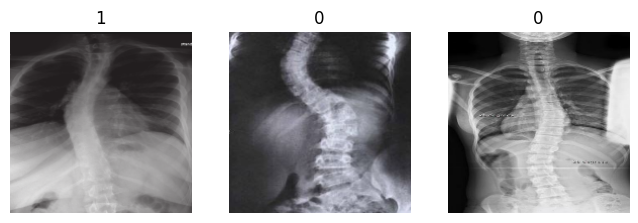

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# Normalize layers

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.95834345


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [ ]:
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# Define model

In [ ]:
num_classes = 2
Model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(4, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(8, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(32, activation='relu'),
layers.Dense(num_classes)])

# Compile the model

In [ ]:
Model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 8)         296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 16)       

# Train the model

In [ ]:
epochs=30
history = Model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/30
2/2 [==============================] - 4s 2s/step - loss: 0.0483 - accuracy: 1.0000 - val_loss: 2.7125 - val_accuracy: 0.5714
Epoch 2/30
2/2 [==============================] - 2s 599ms/step - loss: 0.0358 - accuracy: 1.0000 - val_loss: 2.4689 - val_accuracy: 0.5714
Epoch 3/30
2/2 [==============================] - 1s 364ms/step - loss: 0.0664 - accuracy: 0.9688 - val_loss: 1.8384 - val_accuracy: 0.5714
Epoch 4/30
2/2 [==============================] - 1s 379ms/step - loss: 0.0500 - accuracy: 1.0000 - val_loss: 1.3872 - val_accuracy: 0.5714
Epoch 5/30
2/2 [==============================] - 1s 397ms/step - loss: 0.1573 - accuracy: 0.9062 - val_loss: 1.6936 - val_accuracy: 0.5714
Epoch 6/30
2/2 [==============================] - 1s 369ms/step - loss: 0.0718 - accuracy: 1.0000 - val_loss: 3.0443 - val_accuracy: 0.5714
Epoch 7/30
2/2 [==============================] - 1s 380ms/step - loss: 0.0892 - accuracy: 0.9688 - val_loss: 3.3753 - val_accuracy: 0.5714
Epoch 8/30
2/2 [=======

#  Visualize training results

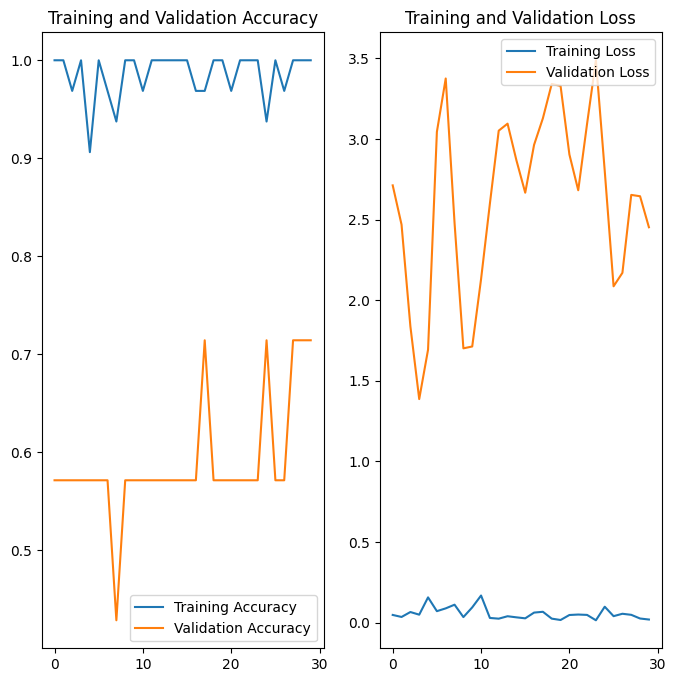

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction

In [ ]:
import os
import os.path as op

path = "/content/drive/MyDrive/Colab Notebooks/dataset/single/c.1.png"
print(os.path.exists(path))

True


In [ ]:
print(Model.name)

sequential_1


1/1 [==============================] - 0s 50ms/step


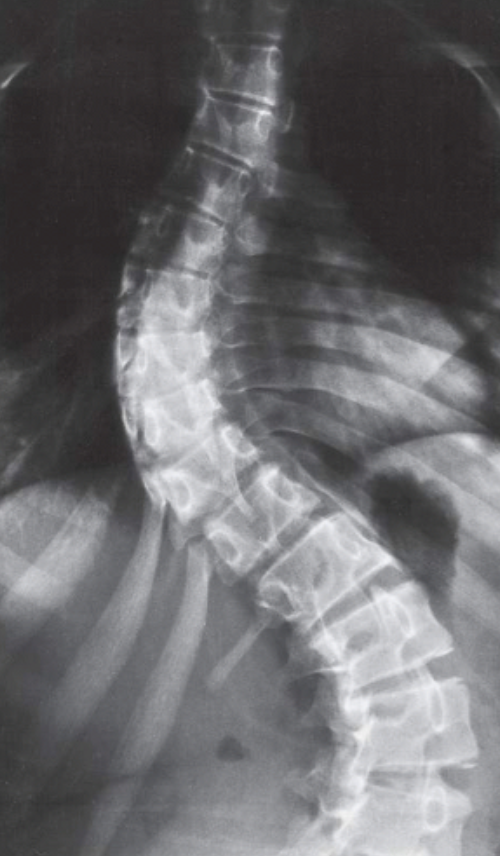

This image most likely belongs to double with a 99.95 percent confidence.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from IPython.display import Image, display

path = "/content/drive/MyDrive/Colab Notebooks/dataset/double/s.1.png"
img_height, img_width = 180, 180

img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = Model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print("This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score)))


# Specifying the dataset path 

In [ ]:
dataset_path = 'drive/MyDrive/Colab Notebooks/dataset'

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the local file
dataset_path = '/content/drive/MyDrive/Colab Notebooks/dataset/'

# Check if the file exists
if os.path.exists(dataset_path):
    # Use the local file path as the origin argument for get_file()
    data = tf.keras.utils.get_file('dataset_photos', origin = 'file:///content/drive/MyDrive/Colab Notebooks/dataset/single/c.1.png'
, untar=True)

    # Convert to a pathlib.Path object
    data = pathlib.Path(data)
else:
    print(f"Dataset path '{dataset_path}' does not exist.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
407222/407222 [==============================] - 0s 0us/step


In [ ]:
import os

path = '/content/drive/MyDrive/Colab Notebooks/dataset'
for root, dirs, files in os.walk(path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")


Root: /content/drive/MyDrive/Colab Notebooks/dataset
Directories: ['single', 'double']
Files: []
Root: /content/drive/MyDrive/Colab Notebooks/dataset/single
Directories: []
Files: ['c.10.png', 'c.1.png', 'c.7.png', 'c.4.png', 'c.5.png', 'c.18.png', 'c.16.png', 'c.14.png', 'c.12.png', 'c.9.png', 'c.13.png', 'c.17.png', 'c.8.png', 'c.15.png', 'c.6.png', 'c.19.png', 'c.11.png', 'c.2.png', 'c.3.png']
Root: /content/drive/MyDrive/Colab Notebooks/dataset/double
Directories: []
Files: ['s.1.png', 's.11.png', 's.18.png', 's.12.png', 's.14.png', 's.17.png', 's.13.png', 's.15.png', 's.19.png', 's.10.png', 's.16.png', 's.9.png', 's.4.png', 's.5.png', 's.20.png', 's.7.png', 's.3.png', 's.6.png', 's.8.png', 's.2.png']


# GUI (Gradio)

Gradio is a machine learning library that creates an interactive application for your trained machine learning model. Gradio creates insightful user interfaces(UI) that allow a user to interact with a trained machine learning model.

It generates a web interface that allows the user to test the trained model and see the prediction results. We can easily integrate Gradio’s user interface right in the Python notebook(either Jupyter notebook or Google Colab notebook) without having to install any dependencies.

Gradio directly works with popular machine learning libraries such as Sckit-learn, Tensorflow, Keras, PyTorch, and Hugging Face Transformers.

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr

In [ ]:
import numpy as np                            
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
import pathlib

Note

1. numpy - We will convert the image dataset into an array.
2. os - This library will enable us to use the operating system functions right in the Google Colab.
3. Matplotlib - It is the plotting library. We will use it to visualize some of the images in Google Colab.
4. tensorflow - We will use this library to build the image classification model. We will import Keras layers from TensorFlow and use them to initialize the convolutional neural network (CNN).
5. pillow (PIL) - We will use the library to manipulate and preprocess the images in our dataset.
6. pathlib - We will use the library to specify the path of the dataset so that we can download the images dataset into Google Colab.

In [ ]:
import os
import os.path as op

path = "/content/drive/MyDrive/Colab Notebooks/dataset/"
print(os.path.exists(path))

True


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
image = gr.inputs.Image(shape=(180,180))

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [ ]:
label = gr.outputs.Label(num_top_classes=2)

/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [ ]:
def predict_input_image(png):
  img_4d=img.reshape(-1,180,180,3)
  prediction=Model.predict(img_4d)[0]
  return {single [i]: float(prediction[i]) for i in range(2)}

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("The path is:", path)

The path is: /content/drive/MyDrive/Colab Notebooks/dataset/


In [ ]:
import os
print(os.path.exists('/content/drive/MyDrive/Colab Notebooks/dataset/'))


True


In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils

In [ ]:
# loading in the data    
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
print('Size of train data {}'.format(X_train.shape))
print('Size of test data {}'.format(X_test.shape))

Size of train data (50000, 32, 32, 3)
Size of test data (10000, 32, 32, 3)


In [ ]:
print('Size of train class {}'.format(y_train.shape))
print('Size of test class {}'.format(y_test.shape))

Size of train class (50000, 1)
Size of test class (10000, 1)


In [ ]:
class_names = ['double, single']
num_classes = len(np.unique(y_train))   

In [ ]:
print('Total class {}'.format(num_classes))

Total class 10


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

1/1 [==============================] - 0s 161ms/step
This image most likely belongs to double with a 73.11 percent confidence.
Image after resizing to 224x224
1/1 [==============================] - 0s 72ms/step
This image most likely belongs to double with a 73.11 percent confidence.
Image after resizing to 224x224


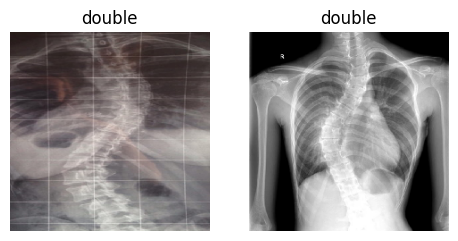

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt

class_names = ['double', 'single']

path_dict = {
  'double':'/content/drive/MyDrive/Colab Notebooks/dataset/double/s.10.png',
  'single':'/content/drive/MyDrive/Colab Notebooks/dataset/single/c.3.png'
}

i =0
plt.figure(figsize=(18, 18))
for key, value in path_dict.items():
    path = os.path.abspath(value)
    i += 1
    img = keras.preprocessing.image.load_img(
        path, target_size=(224, 224))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score)))
    print('Image after resizing to 224x224')
    ax = plt.subplot(1, 6, i + 1)
    plt.imshow(img)
    ax.set_title(class_names[np.argmax(score)])
    plt.axis("off")

In [ ]:
import numpy as np

def predict(image_file):
    # Load the image
    img = image.load_img(image_file, target_size=(180, 180))
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand the dimensions of the array to match the expected input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
    # Make a prediction using the model
    prediction = model.predict(img_array)
    # Return the prediction as a dictionary
    return {'class': np.argmax(prediction), 'confidence': np.max(prediction)}

In [ ]:
import gradio as gr

iface = gr.Interface(fn=predict, inputs="image", outputs="label")
iface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
import gradio as gr
#load your preffered model
app = gr.Interface.load(
             "huggingface/google/vit-base-patch16-224")

#launch
app.launch()

Fetching model from: https://huggingface.co/google/vit-base-patch16-224


/usr/local/lib/python3.10/dist-packages/gradio/interface.py:93: UserWarning: gr.Interface.load() will be deprecated. Use gr.load() instead.
  warnings.warn("gr.Interface.load() will be deprecated. Use gr.load() instead.")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>